In [54]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
FP_depth_path="/home/chengyan/disk2/FoundationPose/demo_data/mustard0/depth/1581120424100262102.png"
hoi_depth_path="/home/chengyan/disk2/FoundationPose/demo_data/mustard_hoisynth/depth_bkp2/aligned_depth_to_color_000068.png"
Dex_depth_path="/home/chengyan/disk2/testarea/aligned_depth_to_color_000006.png"

In [47]:
def Print_unique_value_and_plot(img_path):
    img=cv2.imread(img_path)
    if np.any(img==255):
        print('exist')
    values=np.unique(img)
    print(np.shape(img))
    print("values are",values)
    plt.imshow(img*25,cmap='viridis')
    plt.show()

In [20]:
def change_values_for_mask(mask_path):
    img=cv2.imread(mask_path)
    if np.any(img==255):
        print('exist')
    values=np.unique(img)
    img[img!=3]=0
    img[img==3]=255
    img[292:]=0
    img[291:,:415]=0
    img[:,:393]=0
    img[:,465:]=0

    return(img)

(480, 640, 3)
values are [0 2 3 4 5 6 7]


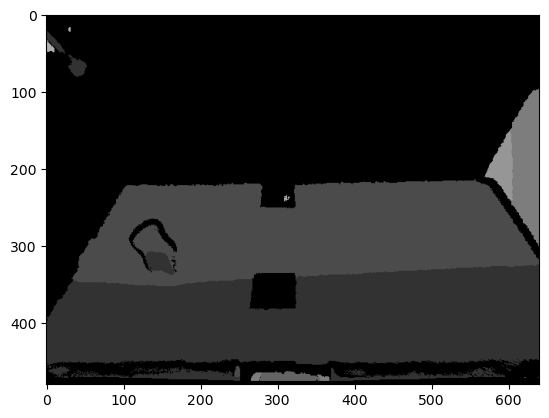

In [48]:
Print_unique_value_and_plot(FP_depth_path)


(480, 640, 3)
values are [0 1 2 3 4 5 6 7]


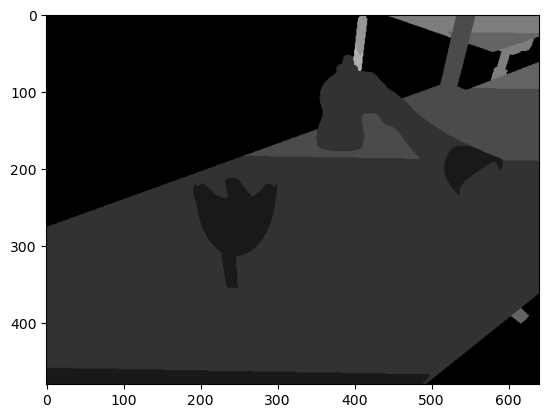

In [57]:
Print_unique_value_and_plot(hoi_depth_path)

In [56]:
input_directory = '/home/chengyan/disk2/FoundationPose/demo_data/mustard_hoisynth/depth_bkp'
output_directory = '/home/chengyan/disk2/FoundationPose/demo_data/mustard_hoisynth/depth_bkp2'

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# List all PNG files in the directory
image_files = sorted([f for f in os.listdir(input_directory) if f.endswith('.png')])

# Process each image
for image_file in image_files:
    # Construct full file path
    input_path = os.path.join(input_directory, image_file)
    output_path = os.path.join(output_directory, image_file)
    
    # Load the image
    img = cv2.imread(input_path)
    if img is None:
        print(f"Error: Could not load the image {input_path}. Skipping...")
        continue
    if len(img.shape) == 3 and img.shape[2] == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img[img == 255] = 0
    img = np.ceil(img / 2).astype(np.uint8)

    # Save the modified image
    cv2.imwrite(output_path, img)

    print(f"Processed and saved {output_path}")


Processed and saved /home/chengyan/disk2/FoundationPose/demo_data/mustard_hoisynth/depth_bkp2/aligned_depth_to_color_000000.png
Processed and saved /home/chengyan/disk2/FoundationPose/demo_data/mustard_hoisynth/depth_bkp2/aligned_depth_to_color_000001.png
Processed and saved /home/chengyan/disk2/FoundationPose/demo_data/mustard_hoisynth/depth_bkp2/aligned_depth_to_color_000002.png
Processed and saved /home/chengyan/disk2/FoundationPose/demo_data/mustard_hoisynth/depth_bkp2/aligned_depth_to_color_000003.png
Processed and saved /home/chengyan/disk2/FoundationPose/demo_data/mustard_hoisynth/depth_bkp2/aligned_depth_to_color_000004.png
Processed and saved /home/chengyan/disk2/FoundationPose/demo_data/mustard_hoisynth/depth_bkp2/aligned_depth_to_color_000005.png
Processed and saved /home/chengyan/disk2/FoundationPose/demo_data/mustard_hoisynth/depth_bkp2/aligned_depth_to_color_000006.png
Processed and saved /home/chengyan/disk2/FoundationPose/demo_data/mustard_hoisynth/depth_bkp2/aligned_de

In [113]:
mask_path="/home/chengyan/disk2/FoundationPose/demo_data/mustard_hoisynth/depth_bkp/aligned_depth_to_color_000000.png"
img=cv2.imread(mask_path)

img[img!=3]=0
img[img==3]=255
img[292:]=0
img[291:,:415]=0
img[:,:393]=0
img[:,465:]=0

cv2.imwrite("/home/chengyan/disk2/FoundationPose/demo_data/mustard_hoisynth/masks", img)

error: OpenCV(4.6.0) /opt/conda/conda-bld/opencv-suite_1664548337286/work/modules/imgcodecs/src/loadsave.cpp:730: error: (-2:Unspecified error) could not find a writer for the specified extension in function 'imwrite_'
